In [2]:
import math
import pandas as pd
import numpy as np
import sklearn
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/code/carolinaemanuele/smoke-detection-analysis

In [3]:
db_smoke_detection = pd.read_csv("./data/smoke_detection_iot.csv")

In [4]:
db_smoke_detection.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


Unnamed:0: Index
UTC: Time in UTC Seconds
Temperature[C]: Air Temperature
Humidity[%]: Air Humidity
TVOC[ppb]: Total Volatile Organic Compounds (measured in parts per billion)
eCO2[ppm]: Equivalent CO2 Concentration (measured in parts per million)
Raw H2: Raw Molecular Hydrogen, uncompensated (bias, temperature, etc.)
Raw Ethanol: Raw Gaseous Ethanol
Pressure[hPA]: Air Pressure
PM1.0: Particulate matter size < 1.0 µm (PM1.0)
PM2.5: Particulate matter size >1.0 µm and < 2.5 µm (PM2.5)
NC0.5: Numeric concentration of particulate matter size < 0.5 µm (NC0.5)
NC1.0: Numeric concentration of particulate matter size 0.5 µm < 1.0 µm (NC1.0)
NC2.5: Numeric concentration of particulate matter size 1.0 µm < 2.5 µm (NC2.5)
CNT: Sample Counter

In [5]:
db_smoke_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [6]:
db_smoke_detection.isnull().sum() 

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [7]:
db_smoke_detection.duplicated().sum()

0

In [8]:
tempo_utc = pd.to_datetime(db_smoke_detection['UTC'], unit='s')
tempo_utc 

0       2022-06-09 00:08:51
1       2022-06-09 00:08:52
2       2022-06-09 00:08:53
3       2022-06-09 00:08:54
4       2022-06-09 00:08:55
                ...        
62625   2022-06-13 14:20:47
62626   2022-06-13 14:20:48
62627   2022-06-13 14:20:49
62628   2022-06-13 14:20:50
62629   2022-06-13 14:20:51
Name: UTC, Length: 62630, dtype: datetime64[ns]

In [9]:
tempo_utc.dt.month.value_counts()

UTC
6    62630
Name: count, dtype: int64

In [10]:
tempo_utc.dt.day.value_counts() 

UTC
9     49988
8      5744
13     5744
10     1154
Name: count, dtype: int64

In [11]:
tempo_utc.dt.year.value_counts()

UTC
2022    62630
Name: count, dtype: int64

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold  
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  ,cross_val_score ,GridSearchCV , KFold , train_test_split
from sklearn.metrics import  confusion_matrix , classification_report,accuracy_score, make_scorer
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import RepeatedStratifiedKFold

https://www.kaggle.com/code/najeeburrehmanmscs/smoke-detection

In [16]:
df = pd.read_csv('./data/smoke_detection_iot.csv')
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [17]:
df.shape

(62630, 16)

In [18]:
df.drop(['Unnamed: 0', 'UTC','CNT'], axis = 1, inplace = True)

In [19]:
for c in df.columns:
    if df[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [20]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [21]:
df.head()
X = df.drop('Fire Alarm', axis=1)
y = df['Fire Alarm']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
X_train.shape,X_test.shape

((43841, 12), (18789, 12))

In [24]:
from sklearn.feature_selection import VarianceThreshold

In [25]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [26]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [27]:
### Finding non constant features
sum(var_thres.get_support())

12

In [28]:
### Finding non constant features
sum(var_thres.get_support())

12

In [29]:
# Lets Find non-constant features 
len(X_train.columns[var_thres.get_support()])

12

In [30]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [31]:
df.corr

<bound method DataFrame.corr of        Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol   
0              20.000        57.36          0        400   12306        18520  \
1              20.015        56.67          0        400   12345        18651   
2              20.029        55.96          0        400   12374        18764   
3              20.044        55.28          0        400   12390        18849   
4              20.059        54.69          0        400   12403        18921   
...               ...          ...        ...        ...     ...          ...   
62625          18.438        15.79        625        400   13723        20569   
62626          18.653        15.87        612        400   13731        20588   
62627          18.867        15.84        627        400   13725        20582   
62628          19.083        16.04        638        400   13712        20566   
62629          19.299        16.52        643        400   13696        20543

In [32]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [33]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

4

In [34]:
corr_features

{'NC0.5', 'NC1.0', 'NC2.5', 'PM2.5'}

In [35]:
X_train.drop(corr_features,axis=1)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0
1062,27.119,53.28,24,400,13034,19931,939.785,0.40
36659,26.830,47.35,1046,602,12815,19466,939.058,2.17
45946,26.680,48.51,1367,422,12941,19382,938.688,1.94
4379,-4.220,54.16,107,400,13229,20117,939.656,2.32
22558,-19.427,54.14,1304,400,12963,19405,938.754,1.81
...,...,...,...,...,...,...,...,...
45891,26.830,47.93,1354,417,12948,19391,938.705,1.99
52416,26.060,47.16,108,408,12778,20634,937.469,2.22
42613,24.900,51.90,1141,400,12906,19445,938.721,1.52
43567,25.380,48.91,1281,424,12902,19406,938.740,1.69


In [36]:
columns_drop = ['NC0.5', 'NC1.0', 'NC2.5', 'PM2.5']

In [37]:
# Remove the categorical data
df.drop(columns_drop, axis=1, inplace=True)
df.shape

(62630, 9)

In [38]:
X = df.drop('Fire Alarm', axis=1)
y = df['Fire Alarm']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [41]:
X_train.shape, y_train.shape

((43841, 8), (43841,))

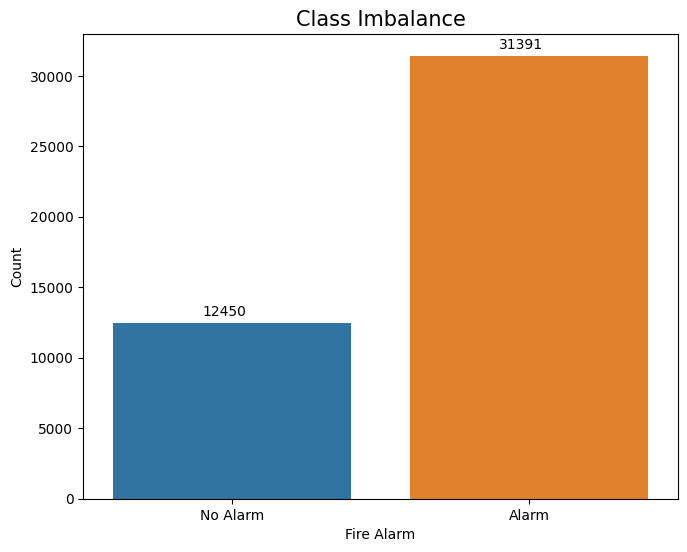

In [42]:
sns.countplot(x = y_train)
plt.text(x = 0 - 0.1, y = y_train.value_counts()[0] + 500, s = y_train.value_counts()[0])
plt.text(x = 1 - 0.1, y = y_train.value_counts()[1] + 500, s = y_train.value_counts()[1])
plt.xticks([0, 1], ['No Alarm', 'Alarm'])
plt.ylabel('Count')
plt.tight_layout(pad = -1)
plt.title('Class Imbalance', fontsize = 15)
plt.show()

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 10) 
X_train, y_train = smote.fit_resample(X_train, y_train)

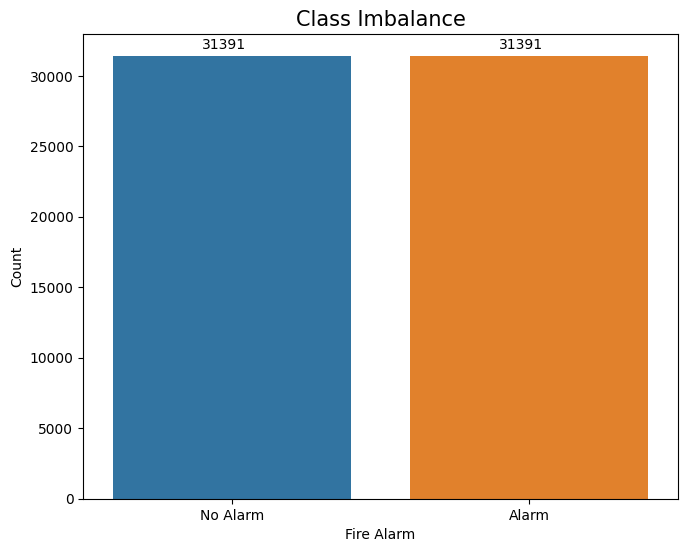

In [45]:
sns.countplot(x = y_train)
plt.text(x = 0 - 0.1, y = y_train.value_counts()[0] + 500, s = y_train.value_counts()[0])
plt.text(x = 1 - 0.1, y = y_train.value_counts()[1] + 500, s = y_train.value_counts()[1])
plt.xticks([0, 1], ['No Alarm', 'Alarm'])
plt.ylabel('Count')
plt.tight_layout(pad = -1)
plt.title('Class Imbalance', fontsize = 15)
plt.show()

In [46]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# The confusion matrix allows us to identify the number of correct 
# and incorrect predictions for each target class.
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm, 
                               columns = ['Predicted: No Alarm', 'Predicted: Alarm'], 
                               index = ['Actual: No Alarm', 'Actual: Alarm'])
    sns.heatmap(conf_matrix, annot = True, cbar = False, fmt = 'd', linewidth = 0.5, annot_kws = {'size': 25})
    plt.xticks()
    plt.yticks()
    plt.title(model_name + " Confusion Matrix", fontsize = 20)
    plt.show()

# The ROC curve (receiver operating characteristic curve) is a graph showing the performance of 
# a classification model by plotting True Positive Rate (TPR) vs. False Positive Rate (FPR) 
# at different classification thresholds. The Area Under Curve (AUC) is simply the area under 
# the ROC curve and it is representative of how well the model can distinguish between the target classes.
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0,1], [0,1], 'r--')
    plt.title('ROC Curve for ' + model_name + ' Classifier', fontsize = 15)
    plt.xlabel('False Positive Rate (1- Specificity)', fontsize = 12)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 12)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred), 4)))
    plt.grid(True)

# Defining a dataframe for tallying the evaluation metrics of all models.
# This will serve as our score card.
score_card = pd.DataFrame(columns = ['Model', 'Precision Score', 'Recall Score', 'f1-Score', 'AUC Score', 'Accuracy Score','CV Score'])

# Defining an iterable to set the appropriate index upon insertion of a new model's metrics:
index_iter = iter(range(1, 10))

# update_score_card updates the score card model name, the target classes 
# and the corresponding model predictions.
def update_score_card(y_test, y_pred, model_name):
    global score_card
    new_score = pd.DataFrame({'Model': model_name, 
                              'Precision Score': metrics.precision_score(y_test, y_pred), 
                              'Recall Score': metrics.recall_score(y_test, y_pred), 
                              'f1-Score': metrics.f1_score(y_test, y_pred), 
                              'AUC Score': roc_auc_score(y_test, y_pred), 
                              'Accuracy Score':metrics.accuracy_score(y_test, y_pred),
                              'CV Score':n_scores.mean()}, 
                             index = [next(index_iter)])
    score_card = pd.concat([score_card, new_score])
    return score_card

In [47]:
from sklearn.linear_model import LogisticRegression
R_model = RandomForestClassifier()
R_model.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_pred_R_model = R_model.predict(X_test)
import joblib

# Giả sử R_model là mô hình của bạn
# Lưu mô hình vào file 'r_model.pkl'
joblib.dump(R_model, 'r_model.pkl')

['r_model.pkl']

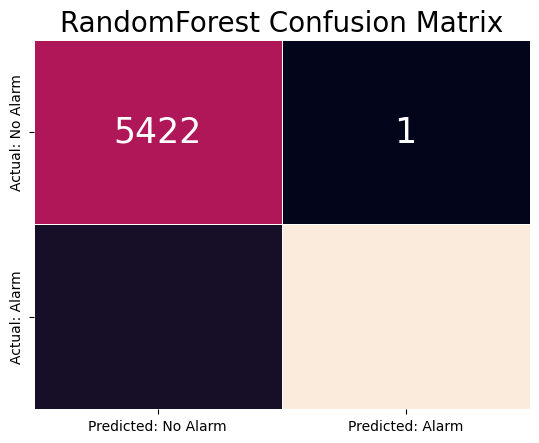

In [49]:
plot_confusion_matrix(y_test, y_pred_R_model, 'RandomForest')

In [50]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(R_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
n_scores

array([0.99984033, 1.        , 1.        , 0.99984033, 1.        ,
       0.999521  , 1.        , 1.        , 1.        , 1.        ,
       0.99984033, 1.        , 1.        , 0.99984033, 0.99984033,
       0.99968066, 1.        , 0.99984033, 1.        , 1.        ,
       0.999521  , 1.        , 0.99984033, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [51]:
n_scores.mean()

0.9999201660546064

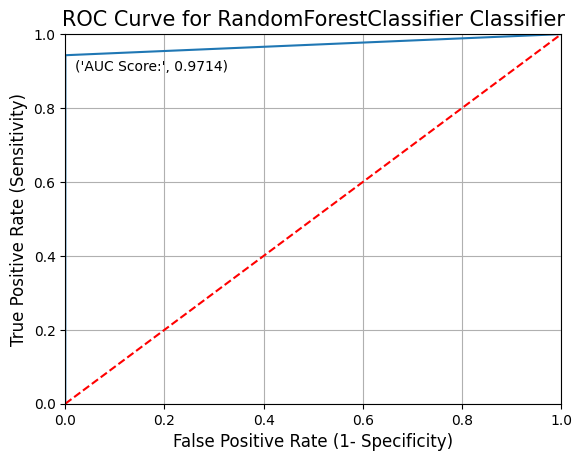

In [52]:
plot_roc(y_test, y_pred_R_model, 'RandomForestClassifier')

In [53]:
update_score_card(y_test, y_pred_R_model, 'RandomForest Classifier(RF)')

,Model,Precision Score,Recall Score,f1-Score,AUC Score,Accuracy Score,CV Score
1,RandomForest Classifier(RF),0.999921,0.942915,0.970581,0.971365,0.959338,0.99992


In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [55]:
y_pred_logreg = logreg.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      5423
           1       0.96      0.91      0.93     13366

    accuracy                           0.91     18789
   macro avg       0.88      0.91      0.89     18789
weighted avg       0.91      0.91      0.91     18789



In [57]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(logreg, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
n_scores

array([0.88583746, 0.88072809, 0.87402203, 0.88535845, 0.87721539,
       0.87849274, 0.88184576, 0.88535845, 0.88120709, 0.87689606,
       0.87849274, 0.88280377, 0.87466071, 0.88679547, 0.87977008,
       0.87785406, 0.88152643, 0.87705572, 0.88024908, 0.88503912,
       0.88296344, 0.87929107, 0.87929107, 0.88088775, 0.87545905,
       0.87913141, 0.88583746, 0.87641705, 0.88887115, 0.87705572])

In [58]:
n_scores.mean()

0.8805471286390975

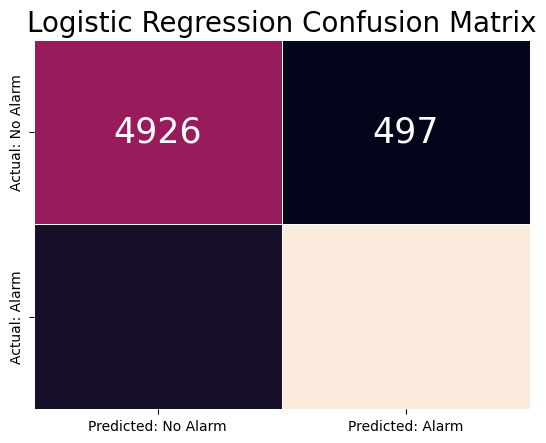

In [59]:
plot_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression')

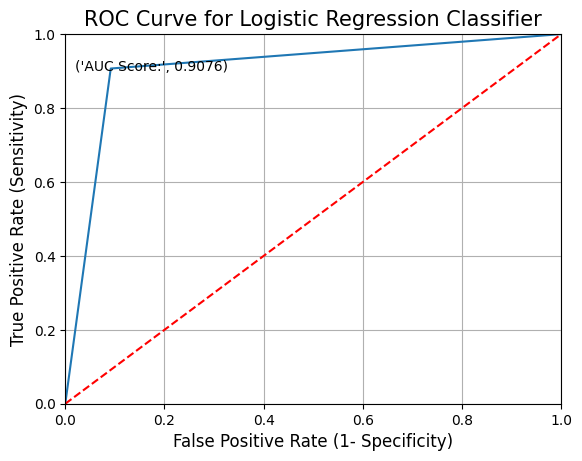

In [60]:
plot_roc(y_test, y_pred_logreg, 'Logistic Regression')

In [61]:
update_score_card(y_test, y_pred_logreg, 'Logistic Regression')

,Model,Precision Score,Recall Score,f1-Score,AUC Score,Accuracy Score,CV Score
1,RandomForest Classifier(RF),0.999921,0.942915,0.970581,0.971365,0.959338,0.999920
2,Logistic Regression,0.960615,0.906928,0.933000,0.907641,0.907339,0.880547
